# Notebook 3: Classical Machine Learning

## TOC:
* [Define model functions to be used for different datasets](#define_function)
* [Positive sample dataset](#model_positive)
    * [Model trained to predict popularity](#model_popularity)
    * [Model trained to predict number of days](#model_days)

* [Orginial positive and negative sample dataset](#model_all)
    * [Training the model](#model_all_train)
    * [Analysis](#model_all_analysis)
* [Nomalized and one hot encoded positive and negative sample dataset](#model_all_normalized)
    * [Training the model](#model_all_normalized_train)
    * [Analysis](#model_all_normalized_analysis)


### Import necessary library

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn import metrics

C:\Users\tiany\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\tiany\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\tiany\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
##test
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Define model functions to be used for different datasets <a name = "define_function"> </a>

In [3]:
def tsvm(X, Y, axes, heatmap = False):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=49)

    clf = svm.SVC()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    if (heatmap):
        sb.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt=".1f",ax=axes)
    return clf.score(x_train, y_train),clf.score(x_test, y_test), accuracy_score(y_test, y_pred),precision_score(y_test, y_pred,average='weighted'),recall_score(y_test, y_pred,average='macro'),f1_score(y_test, y_pred,average='weighted')


In [4]:
def trf(X, Y, axes, heatmap = False):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=49)

    clf = RandomForestClassifier(max_depth=5)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    if (heatmap):
        sb.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt=".1f",ax=axes)
    return clf.score(x_train, y_train),clf.score(x_test, y_test), accuracy_score(y_test, y_pred) ,precision_score(y_test, y_pred,average='weighted'),recall_score(y_test, y_pred,average='macro'),f1_score(y_test, y_pred,average='weighted')


In [5]:
def tlog(X, Y, axes, heatmap = False):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=49)

    clf = LogisticRegression()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    if (heatmap):
        sb.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt=".1f",ax=axes)
    return clf.score(x_train, y_train),clf.score(x_test, y_test), accuracy_score(y_test, y_pred) ,precision_score(y_test, y_pred,average='weighted'),recall_score(y_test, y_pred,average='macro'),f1_score(y_test, y_pred,average='weighted')


In [6]:
def ttree(X, Y, feature, tree, axes, heatmap = False):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=49)

    f = plt.figure(figsize=(24,24))
    clf = tree.DecisionTreeClassifier(max_depth=3)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    if (tree):
        plot_tree(clf, filled=True, rounded=True, feature_names=feature.columns)
        f = plt.figure(figsize=(6,6))
    if (heatmap):
        sb.heatmap(confusion_matrix(y_test, y_pred),annot = True, fmt=".1f", ax = axes)
    return clf.score(x_train, y_train), clf.score(x_test, y_test), accuracy_score(y_test, y_pred) ,precision_score(y_test, y_pred,average='weighted'),recall_score(y_test, y_pred,average='macro'),f1_score(y_test, y_pred,average='weighted')


The function below is used to print out results from the models obtained

In [7]:
def display_metric(data):
    print(f'train set explained variance: {data[0]}')
    print(f'test set explained variance: {data[1]}')
    print('Accuracy:',data[2])
    print('Precision:', data[3])
    print('Recall:', data[4])
    print('F1 score:', data[5])

# Dataset with positive feature <a name = "model_positive"> </a>


## Read positive sample data
all the songs that are popular is in this dataset

In [40]:
postive_data = pd.read_csv('positive_feature.csv')
postive_data.columns

Index(['title', 'tag', 'artist', 'year', 'views', 'features', 'lyrics', 'id',
       'url', 'Number of days_x', 'Year', 'chart', 'region',
       'Number of days_y', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence', 'popularity', 'url_clean'],
      dtype='object')

In [41]:
positive_feature = postive_data[postive_data.columns[14:27]]
positive_feature.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,popularity
0,0.00728,0.625,311867,0.726,0.00000,10,0.3180,-7.731,0,0.1550,103.980,0.483,0
1,0.03020,0.949,284200,0.661,0.00000,5,0.0454,-4.244,0,0.0572,104.504,0.760,86
2,0.41400,0.505,251240,0.494,0.00008,10,0.1050,-8.635,0,0.3150,171.978,0.141,55
3,0.00286,0.908,290320,0.669,0.00000,7,0.2370,-2.827,1,0.0738,112.238,0.662,86
4,0.14400,0.598,262507,0.732,0.00000,4,0.5080,-7.013,1,0.4250,172.329,0.595,70


## Model to predict popularity. <a name = "model_popularity"> </a>

In [10]:
positive_feature = positive_feature.dropna()

X = positive_feature.drop(['popularity'],1)
Y = positive_feature.popularity
Y = Y.astype(int)

C:\Users\tiany\AppData\Local\Temp\ipykernel_75808\2151999646.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = posfea.drop(['popularity'],1)


In [11]:
print("SVM:")
display_metric(tsvm(X, Y, 0))

SVM
train set explained variance: 0.2738001573564123
test set explained variance: 0.24737945492662475
Accuracy: 0.24737945492662475
Precision: 0.06119659471979396
Recall: 0.012345679012345678
F1 score: 0.0981202543910646


C:\Users\tiany\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
print("Random Forest:")
display_metric(trf(X, Y, 0))

RF
train set explained variance: 0.27406241804353526
test set explained variance: 0.24737945492662475
Accuracy: 0.24737945492662475
Precision: 0.06119659471979396
Recall: 0.012345679012345678
F1 score: 0.0981202543910646


C:\Users\tiany\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
print("Logistic Regression")
display_metric(tlog(X, Y, 0))

LR
train set explained variance: 0.27301337529504327
test set explained variance: 0.24737945492662475
Accuracy: 0.24737945492662475
Precision: 0.06119659471979396
Recall: 0.012345679012345678
F1 score: 0.0981202543910646


C:\Users\tiany\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tiany\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
print("Decision Tree")
display_metric(ttree(X, Y, positive_feature, False, 0))

DT
train set explained variance: 0.27406241804353526
test set explained variance: 0.2431865828092243
Accuracy: 0.2431865828092243
Precision: 0.06079664570230608
Recall: 0.012136430215526262
F1 score: 0.09727463312368974


C:\Users\tiany\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1728x1728 with 0 Axes>

---
The results are **not satisfactory** as its accuracy is as low as 0.2. The recall score is also very low of at most 0.01 which means  that the model is not able  to find all the positive samples. 

However, this is expected because the dataset has not been processed and supports the findings we had based on the EDA that we did in the previous notebook. 

Next, we want to check for the prediction of number of days.

---

## Model to predict number of days a song to be trending <a name = "model_days"> </a>
We use number of days because it may be related to popularity as the higher the number of days that a song is trending, the more popular the song is.

In [15]:
positive_feature_days = positive_data.drop(['title','artist','tag','year','views','features','url_clean','popularity', 'lyrics', 'id', 'url','Number of days_y','Year','chart','region'],1)
positive_feature_days.columns

C:\Users\tiany\AppData\Local\Temp\ipykernel_75808\223676454.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  fdays=pos.drop(['title','artist','tag','year','views','features','url_clean','popularity', 'lyrics', 'id', 'url','Number of days_y','Year','chart','region'],1)


Index(['Number of days_x', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence'],
      dtype='object')

In [16]:
positive_feature_days = positive_feature_days.dropna()
positive_feature_days = positive_feature_days.rename(columns={"Number of days_x": "num_of_days"})
X = positive_feature_days.drop(['num_of_days'],1)
Y = positive_feature_days.num_of_days
Y = Y.astype(int)

C:\Users\tiany\AppData\Local\Temp\ipykernel_75808\113490774.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = fdays.drop(['num_of_days'],1)


In [17]:
print("SVM")
display_metric(tsvm(X, Y, 0))

SVM
train set explained variance: 0.1993181222134802
test set explained variance: 0.21174004192872117
Accuracy: 0.21174004192872117
Precision: 0.04488089031437741
Recall: 0.007692307692307693
F1 score: 0.07406318349714577


C:\Users\tiany\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
print("Random Forest")
display_metric(trf(X, Y, 0))

RF
train set explained variance: 0.2019407290847102
test set explained variance: 0.21174004192872117
Accuracy: 0.21174004192872117
Precision: 0.044928034106724454
Recall: 0.007692307692307693
F1 score: 0.07412736303223862


C:\Users\tiany\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
print("Logistic Regression")
display_metric(tlog(X, Y, 0))

LR
train set explained variance: 0.19853134015211119
test set explained variance: 0.21174004192872117
Accuracy: 0.21174004192872117
Precision: 0.0448338453559766
Recall: 0.007692307692307693
F1 score: 0.07399911499931085


C:\Users\tiany\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tiany\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
print("Decision Tree:")
display_metric(ttree(X, Y, positive_feature_days, False, 0))

DT
train set explained variance: 0.2035142932074482
test set explained variance: 0.20335429769392033
Accuracy: 0.20335429769392033
Precision: 0.054339721464348484
Recall: 0.007993301964548404
F1 score: 0.08177568330958772


C:\Users\tiany\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1728x1728 with 0 Axes>

---
### Result findings
Both models trained to predict popularity and number of days **don't provide satisfactory result**. This might be due to the **low correlation** that the features had to popularity, making the results low. Since the data has not been processed to suit the model (eg the popularity column is not categorised and contains a range of numbers, making the result unreliable), the prediction was likely to be low as there is no strong factor to help in the prediction.

We next trained the dataset with both the popular and non popular songs. Instead of using popularity, we used if_popular. This is a column that shows whether a song is popular or not and is a better feature to use to predict as it is already categorised to 1 and 0.

---

### Overall conlusion of positive only dataset
Since using only positive sample does not really give a well rounded view of  the  popularity of the song, we want to explore the results of the model after adding negative samples. This will help the model learn what is considered a popular or non popular song. Having only popular songs may result in some biasness as the model has not seen a non popular song before, making it less reliable in predicitng the popularity of songs.

---

# Original Positive and negative dataset <a name = "model_all"> </a>

## Read positive and negative data
This dataset consists of both the popular and non popular songs

In [21]:
all_data = pd.read_csv('positive_and_negative.csv')
all_data.columns

Index(['tag', 'artist', 'year', 'views', 'features', 'lyrics', 'id', 'url',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence', 'popularity', 'url_clean',
       'if_popular'],
      dtype='object')

## Obtain necessary feature data

In [22]:
all_feature = all_data.drop(['artist','tag','year','views','features','url_clean','popularity', 'lyrics', 'id', 'url'],1)
all_feature.columns

C:\Users\tiany\AppData\Local\Temp\ipykernel_75808\2000023577.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  origfea=orig.drop(['artist','tag','year','views','features','url_clean','popularity', 'lyrics', 'id', 'url'],1)


Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence', 'if_popular'],
      dtype='object')

In [23]:
all_data = all_data.dropna()

X = all_data.drop(['if_popular'],1)
Y = all_data.if_popular
Y = Y.astype(int)

C:\Users\tiany\AppData\Local\Temp\ipykernel_75808\248505656.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = origfea.drop(['if_popular'],1)


## Training different models <a name = "model_all_train"> </a>

In [24]:
origsvm = tsvm(X, Y, 0)
print('SVM')
modelres(origsvm)

SVM
train set explained variance: 0.6083650190114068
test set explained variance: 0.5967488201363398
Accuracy: 0.5967488201363398
Precision: 0.6547810438654421
Recall: 0.6029351565130697
F1 score: 0.5612390187993566


In [25]:
origlog = tlog(X, Y, 0)
print('Logistic Regression')
modelres(origlog)

LR
train set explained variance: 0.6745771600891569
test set explained variance: 0.6664918720503409
Accuracy: 0.6664918720503409
Precision: 0.675471309145523
Recall: 0.668570947529662
F1 score: 0.6636215969491662


C:\Users\tiany\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
origrf = trf(X, Y, 0)
print('Random Forest')
modelres(origrf)

RF
train set explained variance: 0.7057820899436213
test set explained variance: 0.6796014682747772
Accuracy: 0.6796014682747772
Precision: 0.6803270771146503
Recall: 0.6799608689815151
F1 score: 0.679585609722179


DT
train set explained variance: 0.6608102792710109
test set explained variance: 0.6413214472994232
Accuracy: 0.6413214472994232
Precision: 0.6412912250905279
Recall: 0.6406141677175701
F1 score: 0.64089918506948


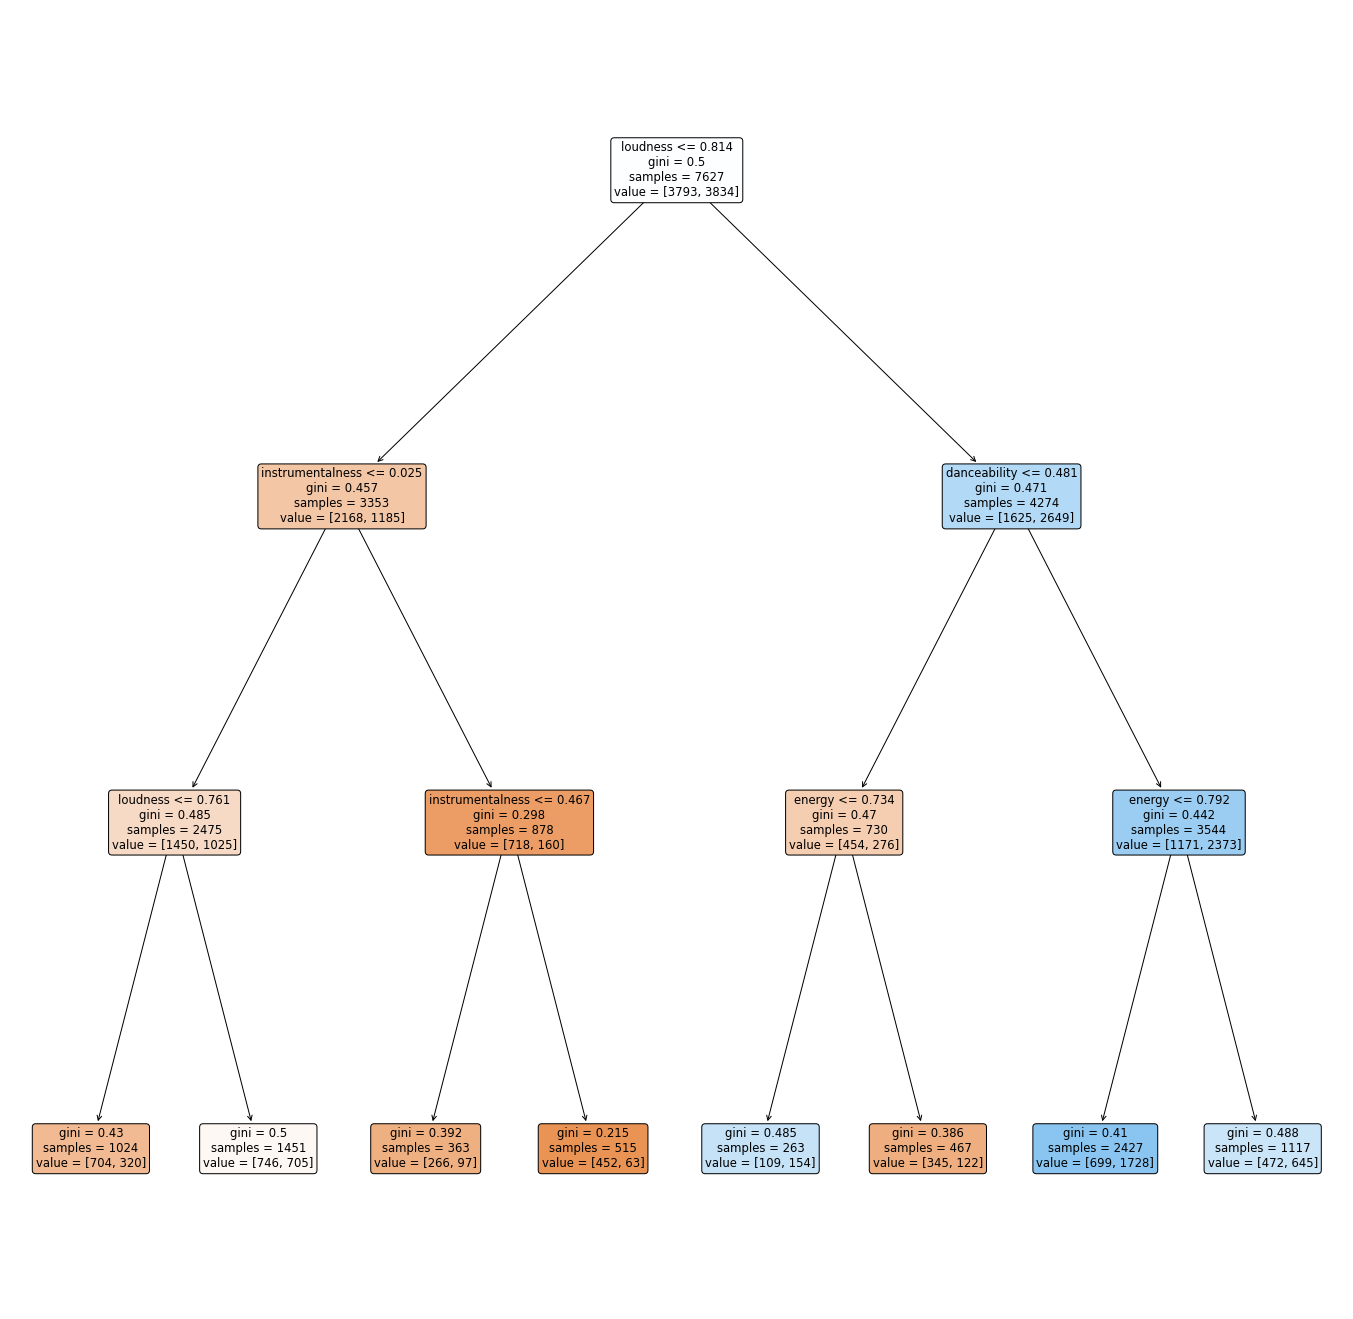

<Figure size 432x432 with 0 Axes>

In [27]:
origtree = ttree(X, Y, all_feature, True, 0)
print('Decision Tree')
modelres(origtree)

---
Based on the decision tree, it seems that loudness is one of the important feature in deciding whether a song is popular, followed by instrumentalness, acousticness and duration_ms. 

As we want a gini score as low as possible, in order to achieve that, we have Loudness <= 0.814, instrumentalness > 0.09, duration_ms <= 0.105. This combination achieved the best gini of 0.128.

---

## Analysis <a name = "model_all_analysis"> </a>
### Comparing confusion matrix of different models 

C:\Users\tiany\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 1.0, 'Decision Tree')

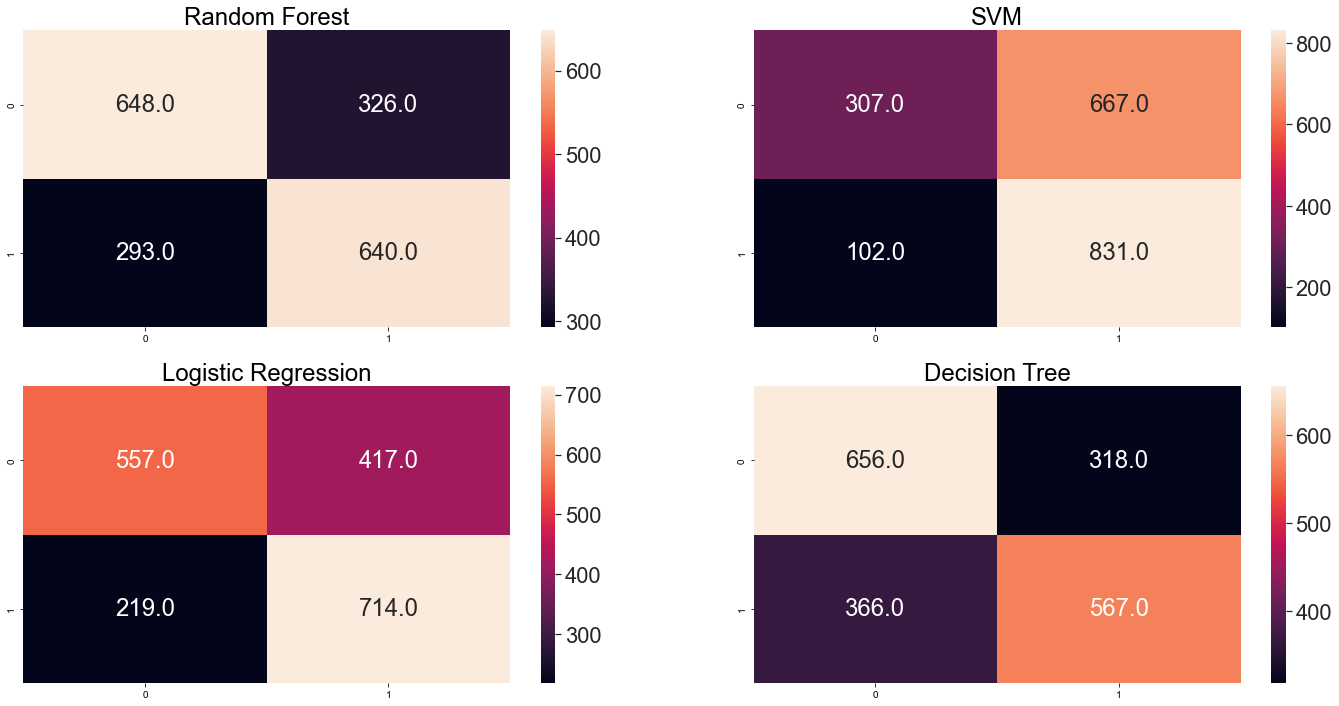

<Figure size 1728x1728 with 0 Axes>

In [28]:
f, ax = plt.subplots(2, 2, figsize=(24, 12))
sb.set(font_scale=2)
trf(X,Y,True,ax[0,0])
ax[0,0].set_title('Random Forest')

tsvm(X,Y,True,ax[0,1])
ax[0,1].set_title('SVM')

tlog(X,Y,True,ax[1,0])
ax[1,0].set_title('Logistic Regression')

ttree(X,Y,origfea,True,ax[1,1],False)
ax[1,1].set_title('Decision Tree')

---
Based on the confusion matrix, we can conclude that random forest is the better model.

For random forest, the true positive is 751 while the false positive is 326. There is still alot of data being predicted wrongly as popular. The true negative is 588 while the false negative is 242 which is better than other models.

Logisitc regression has a true positive of 713 and 401 false positive. It has a higher false positive  ompared to random forest's which is not good. The true negative of 554 and false negative of 239 was quite similar to that of random forest.

Although SVM also has a higher true positive of 830, it also has a high false positive of 621 which is not very good.

Decision tree's true positive and false positive were also low considering that other models had true positive of more than 700. Its true negative and false negative results were also quite low as compared to the other models.

SVM is not a very good model here because it had high false positive and low true negative as compared to the other models.

---

# Normalized and one hot encoded positive and negative dataset <a name = "model_all_normalized"> </a>
this dataset consists of both the popular and non popular songs which has been one hot encoded.

## Read normalized and one hot encoded positive and negative dataset 

In [29]:
onehot=pd.read_csv('positive_and_negative_one_hot.csv')
onehot

,artist,year,views,features,lyrics,id,url,acousticness,danceability,duration_ms,...,key_8,key_9,key_10,key_11,tag_country,tag_misc,tag_pop,tag_rap,tag_rb,tag_rock
0,AKING,2015,4.432273e-05,{},Glorious mistakes are anxiously waiting to be ...,985583,https://open.spotify.com/track/30sr35axWFPOvmi...,0.760040,0.806517,0.144170,...,0,0,0,0,0,0,1,0,0,0
1,Filip Winther,2020,1.251733e-06,{},[Intro]\nDe-de-deluxe\n\n[Refräng]\nJag fuckar...,5097257,https://open.spotify.com/track/4mznGf6tTvHp74y...,0.020681,0.894094,0.141797,...,0,0,0,1,0,0,0,1,0,0
2,Dan Reeder,2018,1.513459e-05,{},The guy who bathes in the pond at the park\nTh...,3407076,https://open.spotify.com/track/1UbSSyqIVEkooKe...,0.993976,0.554990,0.044422,...,0,0,0,0,0,0,1,0,0,0
3,Noa Azazel,2021,1.251733e-06,{},[Pre-Chorus]\nWhen the moon is taking over i'm...,7061926,https://open.spotify.com/track/51F8whLH1Qou7iV...,0.214858,0.419552,0.169140,...,0,0,0,0,0,0,1,0,0,0
4,070 Phi,2019,2.031221e-05,{},[Chorus]\nAin't no way that you ain't eatin' w...,4241387,https://open.spotify.com/track/0mvzUwvyLT1Dm1y...,0.367469,0.695519,0.146753,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9529,mounika yadav,2021,1.257423e-05,"{""Allu Arjun"",""Rashmika Mandanna""}",నువ్ అమ్మీ అమ్మీ అంటాంటే నీ పెళ్ళాన్నైపోయినట్ట...,7552375,https://open.spotify.com/track/4ZUxhQNRCzlh6al...,0.360441,0.821792,0.161581,...,0,0,0,0,0,0,1,0,0,0
9530,d-metal stars,2016,1.706909e-07,{},[Verse 1]\nThe seaweed is always greener\nIn s...,7558599,https://open.spotify.com/track/0F8nLktPi0SgOAm...,0.000092,0.542770,0.154411,...,1,0,0,0,0,0,0,0,0,1
9531,grupo firme,2021,2.048290e-06,{Maluma},"Dejen de meterse ya, en donde no les importa\n...",7728445,https://open.spotify.com/track/5BE9B2FiFWBbBdo...,0.137549,0.719959,0.142190,...,0,0,0,0,0,0,1,0,0,0
9532,hensonn,2021,7.567295e-06,{},[Instrumental],7814578,https://open.spotify.com/track/6nqdgUTiWt4JbAB...,0.146585,0.626273,0.122640,...,0,0,0,0,0,0,0,1,0,0


## Obtain necessary features

In [30]:
onehot.columns

Index(['artist', 'year', 'views', 'features', 'lyrics', 'id', 'url',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'mode', 'speechiness',
       'tempo', 'valence', 'popularity', 'url_clean', 'if_popular', 'key_0',
       'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8',
       'key_9', 'key_10', 'key_11', 'tag_country', 'tag_misc', 'tag_pop',
       'tag_rap', 'tag_rb', 'tag_rock'],
      dtype='object')

---
We dropped the columns that are not relevant for prediction and kept the data that has been one hot encoded. This included the tag column as it was previously not suitable for the model, we did not use it. After one hot encoding, we can then use the tag column as one of our features to predict.

---

In [31]:
onehotfea = onehot.drop(['artist','features','lyrics','id','url','url_clean','popularity', 'year', 'views'],1)
onehotfea.columns

C:\Users\tiany\AppData\Local\Temp\ipykernel_75808\2505358909.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  onehotfea = onehot.drop(['artist','features','lyrics','id','url','url_clean','popularity', 'year', 'views'],1)


Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'mode', 'speechiness',
       'tempo', 'valence', 'if_popular', 'key_0', 'key_1', 'key_2', 'key_3',
       'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10',
       'key_11', 'tag_country', 'tag_misc', 'tag_pop', 'tag_rap', 'tag_rb',
       'tag_rock'],
      dtype='object')

In [32]:
onehotfea = onehotfea.dropna()

X = onehotfea.drop(['if_popular'],1)
Y = onehotfea.if_popular
Y = Y.astype(int)


C:\Users\tiany\AppData\Local\Temp\ipykernel_75808\44564871.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = onehotfea.drop(['if_popular'],1)


## Train different models <a name = "model_all_normalized_train"> </a>

In [33]:
onehotrf = trf(X,Y,False,0)
print('RF')
modelres(onehotrf)

RF
train set explained variance: 0.7019798085748
test set explained variance: 0.6869428421604614
Accuracy: 0.6869428421604614
Precision: 0.6882733162780575
Recall: 0.687531224483957
F1 score: 0.6868085299048412


In [34]:
onehotlog = tlog(X,Y,False, 0)
print('LR')
modelres(onehotlog)

LR
train set explained variance: 0.6869017962501639
test set explained variance: 0.6743576297850026
Accuracy: 0.6743576297850026
Precision: 0.6799437473928549
Recall: 0.6759102143402638
F1 score: 0.6728653283236977


In [35]:
onehotsvm = tsvm(X,Y,False,0)
print('SVM')
modelres(onehotsvm)

SVM
train set explained variance: 0.6858528910449718
test set explained variance: 0.6775039328788673
Accuracy: 0.6775039328788673
Precision: 0.6929903237068552
Recall: 0.6802310226664994
F1 score: 0.6726029774839235


DT
train set explained variance: 0.6608102792710109
test set explained variance: 0.6413214472994232
Accuracy: 0.6413214472994232
Precision: 0.6412912250905279
Recall: 0.6406141677175701
F1 score: 0.64089918506948


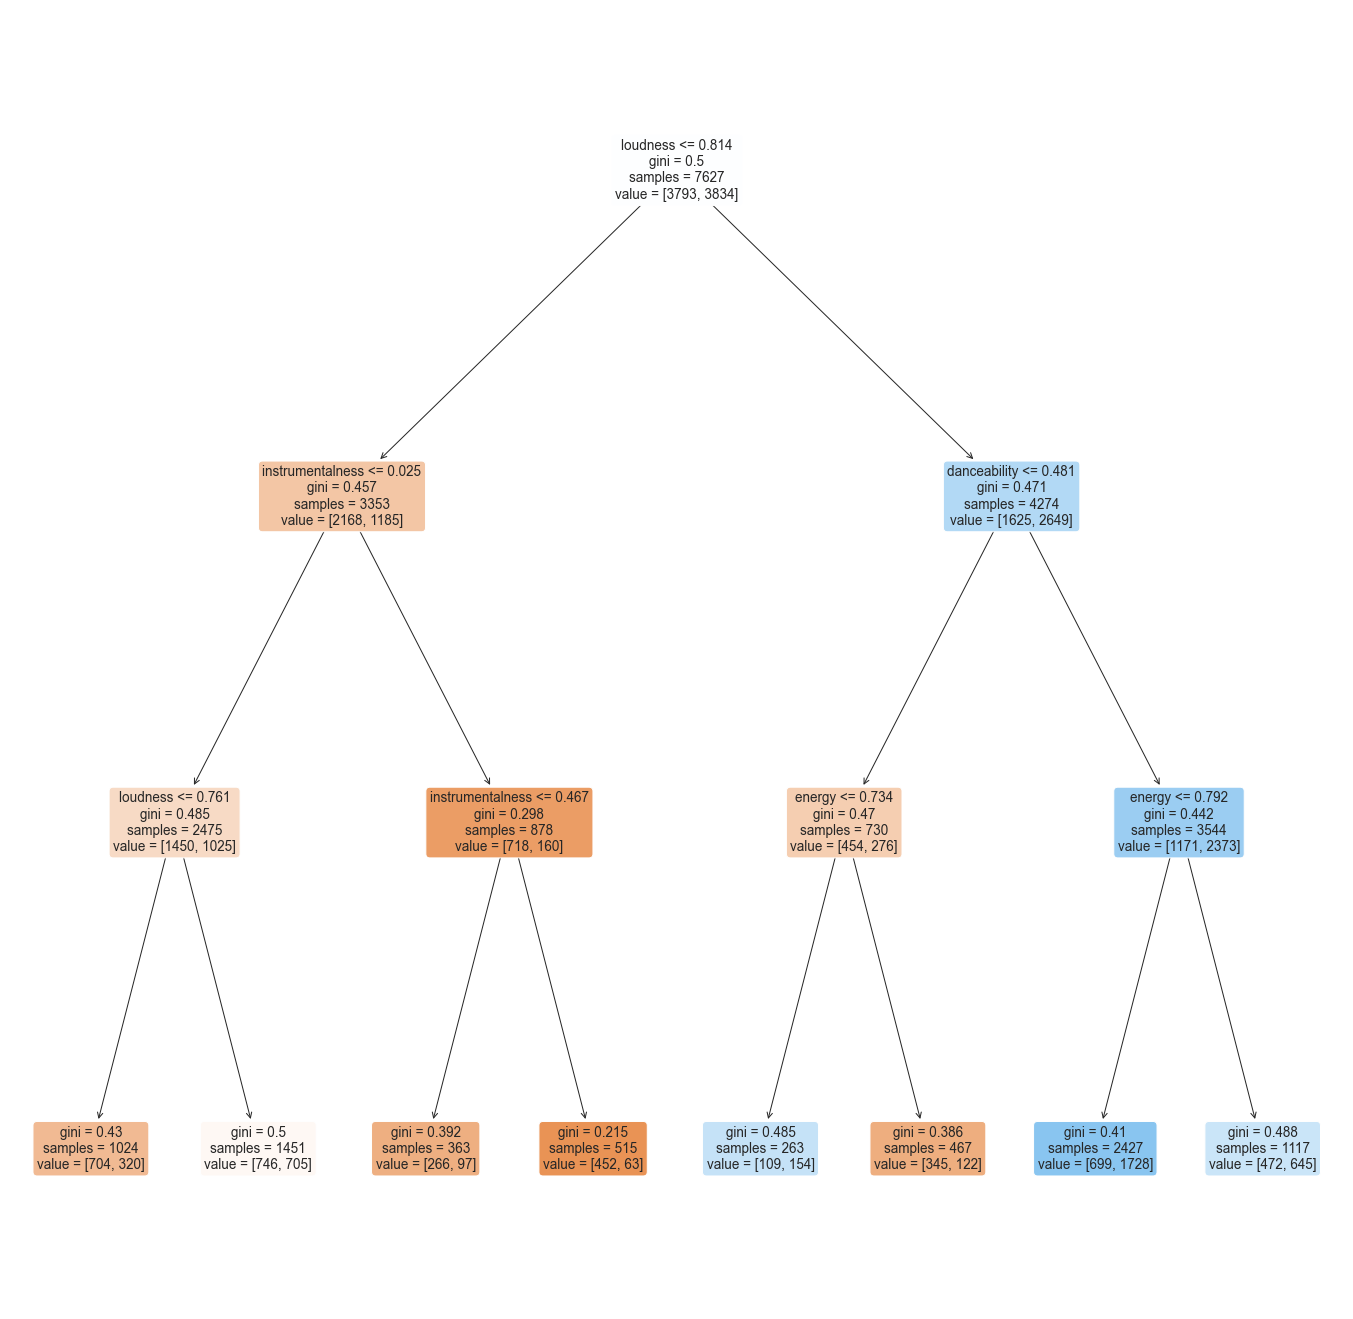

<Figure size 432x432 with 0 Axes>

In [36]:
onehottree = ttree(X,Y,onehotfea,False,0,True)
print('DT')
modelres(onehottree)

---
Based on the decision tree, it seems that loudness remains as one of the important feature in deciding whether a song is popular no matter whether the dataset has gone through one hot encoding or not. This was then followed by instrumentalness, danceability and energy.

As we want a gini score as low as possible, in order to achieve that, we have Loudness <= 0.814, instrumentalness > 0.436. This combination achieved the best gini of 0.235. However, this gini score is higher than the gini score achieved when the dataset has not gone through one hot encoding.

this may mean that one hot encoding of data for decision tree might not be an important change for the model.

---

## Analysis <a name = "model_all_normalized_analysis"> </a>
### Comparing confusion matrixes of the different models 

Text(0.5, 1.0, 'Decision Tree')

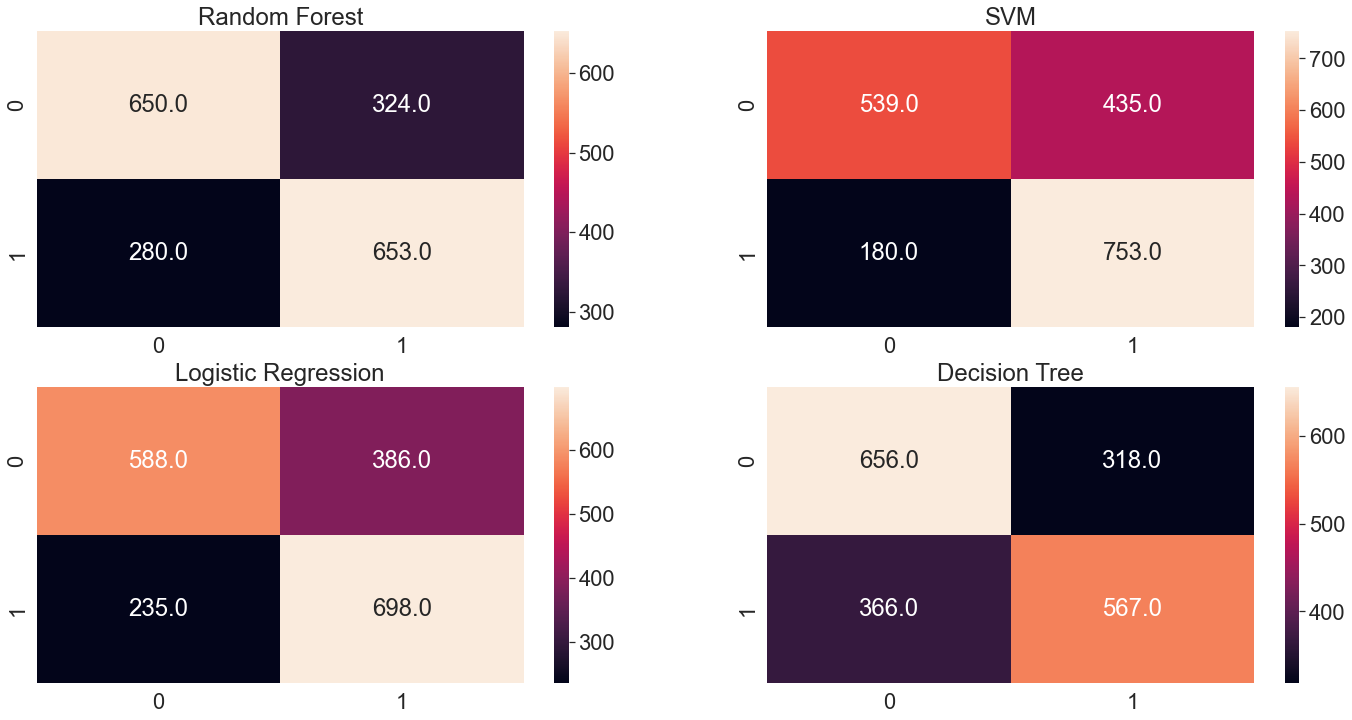

<Figure size 1728x1728 with 0 Axes>

In [37]:
f, ax = plt.subplots(2, 2, figsize=(24, 12))
sb.set(font_scale=2)

trf(X,Y,True,ax[0,0])
ax[0,0].set_title('Random Forest')

tsvm(X,Y,True,ax[0,1])
ax[0,1].set_title('SVM')

tlog(X,Y,True,ax[1,0])
ax[1,0].set_title('Logistic Regression')

ttree(X,Y,onehotfea,True,ax[1,1],False)
ax[1,1].set_title('Decision Tree')

---

Based on the confusion matrix, we can conclude that random forest and logistic regression are the better models.

For random forest, the true positive is 665 while the false positive is 316. There is still alot of data being predicted wrongly as popular. The true negative is 628 while the false negative is 298 which is better than other models.

Logisitc regression has a higher true positive of 734 and 361 false positive. This is a slight increase to the false positive predicted in random forest. However, since  the true positive is higher than random forest's, its score might be close to random forest's.

Although SVM also has a higher true positive of 739, it also has a high false positive of 435 which is not very good. 

Decision tree's true positive and false positive were also low considering that other models had true positive of more than 650. Its  true negative and false negative results were  also quite bad as compared  to the other models.

SVM and decision tree are not a very good model as theirh false positive and false negative are quite high as compared to their true positive and  true negatve

---

In [38]:
results=pd.DataFrame(np.array([origsvm,origlog,origrf,origtree,onehotsvm,onehotlog,onehotrf,onehottree])).T
results=results.rename(columns={0:'origsvm',1:'origlog',2:'origrf',3:'origtree',4:'onehotsvm',5:'onehotlog',6:'onehotrf',7:'onehottree'})
results=results.rename(index={0:'train',1:'test',2:'accuracy',3:'precision',4:'recall',5:'f1'})
results

,origsvm,origlog,origrf,origtree,onehotsvm,onehotlog,onehotrf,onehottree
train,0.608365,0.674577,0.705782,0.660810,0.685853,0.686902,0.701980,0.660810
test,0.596749,0.666492,0.679601,0.641321,0.677504,0.674358,0.686943,0.641321
accuracy,0.596749,0.666492,0.679601,0.641321,0.677504,0.674358,0.686943,0.641321
precision,0.654781,0.675471,0.680327,0.641291,0.692990,0.679944,0.688273,0.641291
recall,0.602935,0.668571,0.679961,0.640614,0.680231,0.675910,0.687531,0.640614
f1,0.561239,0.663622,0.679586,0.640899,0.672603,0.672865,0.686809,0.640899


---

The table above is a summary of the results from the different models and dataset used.

Random forest has the highest score of 0.68, making it the best model out of the other models. 

The insight gained was that **one hot encoded data** helps to **increase** the score of the results because it transform categorical data to numerical, ensuring that models do not assume that higher numbers are more important.

---

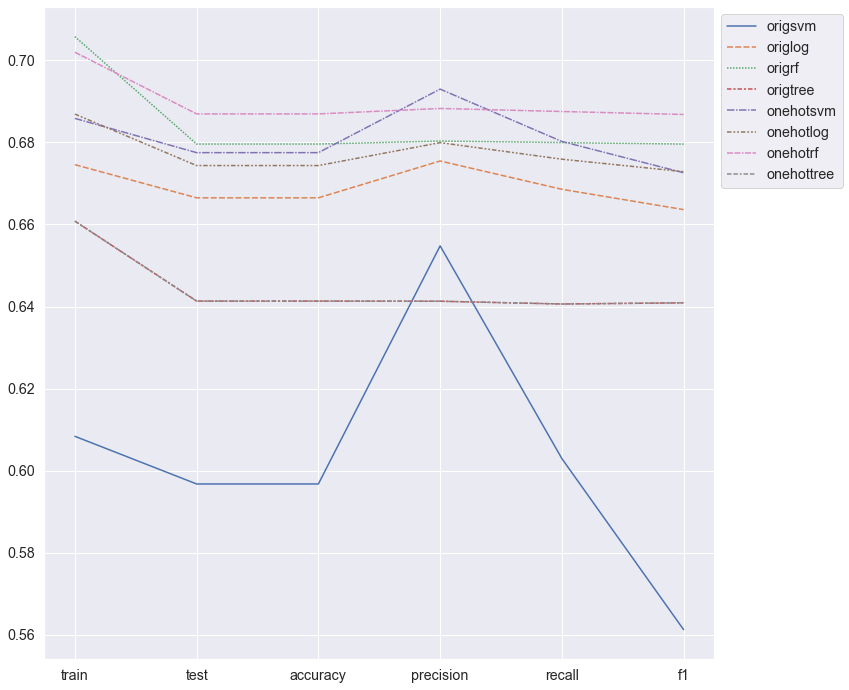

In [39]:
f = plt.figure(figsize=(12,12))
sb.set(font_scale=1.3)
sb.lineplot(data=results)
plt.legend(loc=2, bbox_to_anchor = (1,1))

---

Based on the graph above, using svm on the dataset that has not been one hot encoded resulted in a very different line from the other models. 

The rest of the models had similar line plot and was around the range of 0.65 to 0.7

As our basic machine learning did not have a very good score, we have decided to use bert to train our models. Other than using features to predict the popularity, we also incorporated lyrics into the model. This will be in the next notebook where bert will be used to train the dataset.

---